# EDA NOTEBOOK

- Contains summary statistics (univariate/bivariate) of all the features in the raw data
- A few plots have been included to paint a better picture for some insights

In [1]:
# clear the workspace
%reset -f

# Input raw data path
raw_data_path = r".\test_data.csv"
# Input path to store missing value information 
missing_info_path = r".\missing_info.csv"
# Input final plot save path
plt_save_path = r".\final_distribution"

In [2]:
import pandas as pd
import numpy as np
import collections

# print list of files in directory
import os
print(os.listdir())

# print/display all plots inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns=100
pd.options.display.max_rows=1000

['.ipynb_checkpoints', 'EDA_NB.ipynb', 'final_distribution.png', 'missing_info.csv', 'test_data.csv']


In [1]:
## run this script to install the pandas profiling package which is an automated method to generate an initial complete EDA output

# !python -m pip install --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org pandas-profiling[notebook]

In [ ]:
df = pd.DataFrame(
    np.random.rand(100, 5),
    columns=["a", "b", "c", "d", "e"]
)

profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [3]:
def csv_read(file_path, cols_to_remove=None):
    x=pd.read_csv(file_path, na_values=['No Data', ' ', 'UNKNOWN'])
    print(x.shape)
    if cols_to_remove is not None: x.drop(cols_to_remove, axis = 1, inplace = True)
    chars_to_remove = [' ', '.', '(', ')', '__', '-']
    for i in chars_to_remove:
        x.columns = x.columns.str.strip().str.lower().str.replace(i, '_')
    return x

def xlsx_read(file_path, cols_to_remove=None):
    x=pd.read_excel(file_path, na_values=['No Data', ' ', 'UNKNOWN'])
    print(x.shape)
    if cols_to_remove is not None: x.drop(cols_to_remove, axis = 1, inplace = True)
    chars_to_remove = [' ', '.', '(', ')', '__', '-']
    for i in chars_to_remove:
        x.columns = x.columns.str.strip().str.lower().str.replace(i, '_')
    return x

cols_to_remove = []

In [4]:
train=csv_read(file_path=raw_data_path, cols_to_remove=cols_to_remove)

(5734, 105)


In [5]:
# the dimensions of the response variable

print(collections.Counter(train['label']))

Counter({0: 5453, 1: 281})


In [6]:
def num_missing(self):
    return sum(self.isnull())
train_miss=train.apply(num_missing, axis=0)
missing = pd.DataFrame({'missing_vals': train_miss}) # display count of NAs per column
missing['missing_vals'] = 100*(missing['missing_vals']/train.shape[0])

missing.index.name = 'columns'
missing.reset_index(inplace=True)

missing.to_csv(missing_info_path, index=False)

In [10]:
from IPython.display import display, HTML

print('Total unique values for each feature: ')
display(pd.DataFrame({'unique count': train.nunique()}))

Total unique values for each feature: 


,unique count
columns,
global_id,5734
original_id,5734
label,2
pay_scale_group,18
pers_subarea_text,131
service_years,2132
age,4364
group,153
abinbev_entity2,9


In [8]:
#define a function to return all the stats required for univariate analysis of continuous variables
def univariate_stats_continuous(df_raw_data, var_cont):

    #for each column, check the following -> 1) number of rows in each variable, 2) number of rows with missing values and 3) % of rows with missing values
    df_variable_stats = pd.DataFrame(df_raw_data[var_cont].dtypes).T.rename(index={0:'column type'})
    df_variable_stats = df_variable_stats.append(pd.DataFrame(df_raw_data[var_cont].isnull().sum()).T.rename(index={0:'null values (nb)'}))
    df_variable_stats = df_variable_stats.append(pd.DataFrame(df_raw_data[var_cont].isnull().sum()/df_raw_data[var_cont].shape[0])
                             .T.rename(index={0:'null values (%)'}))
    
    #get stats for every continuous variable 
    df_variable_stats = df_variable_stats.append(df_raw_data[var_cont].agg(['count', 'size', 'nunique', 'mean','median','std', 'var', 'skew', 'kurtosis', 'min', 'max']))
    
    #get mode for every variable - manual since there were some unresolved errors
    temp_list_1 = []
    temp_list_2 = []
    for i in list(df_raw_data[var_cont].columns):
        #print(i)
        temp_list_1.append(df_raw_data[i].mode()[0])
        temp_list_2.append(i)
    temp_list_1 = pd.Series(temp_list_1)
    temp_list_1.index = temp_list_2
    temp_list_1.name = 'mode'
    
    df_variable_stats = df_variable_stats.append(pd.DataFrame(temp_list_1).T)

    def return_percentile(df_name, percentile_array, index_array):
        """
        This function returns different percentiles for all the columns of a given DataFrame
        This function is built to function only for continuous variables
        """
        df_quantile = df_name.quantile(percentile_array)
        df_quantile['rows'] = index_array
        df_quantile = df_quantile.reset_index()
        df_quantile.drop('index', axis=1, inplace=True)
        df_quantile.set_index(['rows'], inplace=True)
        
        return df_quantile
    
    percentile_array = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.25,0.3,0.33,0.4,0.5,0.6,0.66,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1]
    index_array = ['0%','1%','2%','3%','4%','5%','6%','7%','8%','9%','10%','20%','25%','30%','33%','40%','50%','60%','66%','70%','75%','80%','90%','91%','92%','93%','94%','95%','96%','97%','98%','99%','100%']
    
    df_quantile = return_percentile(df_raw_data[var_cont], percentile_array, index_array)

    df_variable_stats = df_variable_stats.append(df_quantile).T

    df_variable_stats.reset_index(inplace=True)
    df_variable_stats.drop('column type', axis=1, inplace=True)
    df_variable_stats.dtypes
    
    df_variable_stats = df_variable_stats[['columns','nunique','null values (nb)','null values (%)','mean','median','mode','std','var','max','min','count','kurtosis','skew','0%','1%','2%','3%','4%','5%','6%','7%','8%','9%','10%','20%','25%','30%','33%','40%','50%','60%','66%','70%','75%','80%','90%','91%','92%','93%','94%','95%','96%','97%','98%','99%','100%']]
    df_variable_stats.columns = ['Variable','Unique values','Missing values','Missing percent','Mean','Median','Mode','Std. Dev.','Variance','Max','Min','Range','Kurtosis','Skewness','0%','1%','2%','3%','4%','5%','6%','7%','8%','9%','10%','20%','25%','30%','33%','40%','50%','60%','66%','70%','75%','80%','90%','91%','92%','93%','94%','95%','96%','97%','98%','99%','100%']

    #return the final dataframe containing stats for continuous variables
    return df_variable_stats

In [9]:
var_cont = train.select_dtypes(include=['int64', 'float64']).columns.values

df_stats_1 = univariate_stats_continuous(df_raw_data=train, var_cont=var_cont)

In [11]:
df_stats_1

,Variable,Unique values,Missing values,Missing percent,Mean,Median,Mode,Std. Dev.,Variance,Max,Min,Range,Kurtosis,Skewness,0%,1%,2%,3%,4%,5%,6%,7%,8%,9%,10%,20%,25%,30%,33%,40%,50%,60%,66%,70%,75%,80%,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%,100%
0,global_id,5734,0,0,1.19428e+07,1.07057e+07,1.00011e+07,5.65167e+06,3.19414e+13,9.97916e+07,1.00011e+07,5734,182.482,12.1836,1.00011e+07,1.00064e+07,1.0007e+07,1.00078e+07,1.00113e+07,1.00145e+07,1.00268e+07,1.00415e+07,1.00423e+07,1.00433e+07,1.00499e+07,1.01556e+07,1.02159e+07,1.02769e+07,1.03045e+07,1.03079e+07,1.07057e+07,1.07105e+07,1.07126e+07,1.07143e+07,1.07161e+07,1.09909e+07,1.70939e+07,1.70946e+07,1.7095e+07,1.70956e+07,1.7096e+07,1.70965e+07,1.70969e+07,1.70975e+07,1.70984e+07,1.74001e+07,9.97916e+07
1,original_id,5734,0,0,1.01604e+07,1.0304e+07,6.10014e+06,5.30837e+06,2.81788e+13,9.97916e+07,6.10014e+06,5734,255.361,15.4498,6.10014e+06,7.04986e+06,7.05906e+06,7.0748e+06,7.0767e+06,7.09073e+06,7.09215e+06,7.09315e+06,7.09384e+06,7.0944e+06,7.09492e+06,1.00071e+07,1.00416e+07,1.00573e+07,1.00922e+07,1.01842e+07,1.0304e+07,1.07008e+07,1.07049e+07,1.0707e+07,1.07093e+07,1.07114e+07,1.07149e+07,1.07154e+07,1.07158e+07,1.07161e+07,1.07164e+07,1.07167e+07,1.07172e+07,1.07178e+07,1.09917e+07,1.09961e+07,9.97916e+07
2,label,2,0,0,0.0490059,0,0,0.215899,0.0466125,1,0,5734,15.4718,4.17928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
3,service_years,2132,286,0.0498779,9.25169,5.45391,1,9.22462,85.0936,99.9993,1,5448,5.32266,1.63008,1,1,1,1,1,1,1,1,1,1.03219,1.16635,1.87547,2.22044,2.58458,2.9104,3.77284,5.45391,7.37592,10.5576,11.8798,14.2426,16.9778,23.5151,24.7819,25.8368,26.7494,27.7295,28.6495,29.6269,30.8057,32.2149,35.2368,99.9993
4,age,4364,316,0.0551099,37.773,34.8755,24.0224,11.1882,125.175,73.0145,20.2797,5418,-0.715745,0.635031,20.2797,22.815,23.2696,23.594,23.8518,24.0845,24.3865,24.6247,24.8219,25.029,25.2408,27.35,28.3729,29.3972,30.1679,31.8594,34.8755,38.3876,41.1303,43.2532,46.2179,49.2955,55.2293,55.9156,56.3753,57.1144,57.9203,58.5558,59.4637,60.2804,61.2569,63.5056,73.0145
5,manager_global_id,1255,0,0,1.37093e+07,1.03048e+07,1.0711e+07,1.36266e+07,1.85685e+14,9.97907e+07,1.00014e+07,5734,33.5332,5.83369,1.00014e+07,1.00064e+07,1.00067e+07,1.00069e+07,1.00077e+07,1.00081e+07,1.00116e+07,1.00183e+07,1.00413e+07,1.00420e+07,1.00425e+07,1.01067e+07,1.01477e+07,1.01859e+07,1.01998e+07,1.02406e+07,1.03048e+07,1.03081e+07,1.07034e+07,1.07073e+07,1.07121e+07,1.70411e+07,1.70927e+07,1.70932e+07,1.70935e+07,1.70939e+07,1.70946e+07,1.70956e+07,1.70966e+07,1.74001e+07,9.90033e+07,9.91053e+07,9.97907e+07
6,personnel_number_manager,1255,0,0,1.19496e+07,1.01961e+07,1.0711e+07,1.37229e+07,1.88319e+14,9.97907e+07,6.10014e+06,5734,35.5471,6.0762,6.10014e+06,7.04266e+06,7.05139e+06,7.05572e+06,7.0735e+06,7.07533e+06,7.07643e+06,7.07791e+06,7.09152e+06,7.0921e+06,7.09226e+06,1.00068e+07,1.00262e+07,1.00527e+07,1.00623e+07,1.01244e+07,1.01961e+07,1.02547e+07,1.03043e+07,1.03057e+07,1.03069e+07,1.07007e+07,1.07104e+07,1.07109e+07,1.07113e+07,1.07124e+07,1.07136e+07,1.07167e+07,1.09922e+07,1.2026e+07,9.90033e+07,9.91053e+07,9.97907e+07
7,manager_service_years,838,127,0.0221486,11.961,10.6149,1,8.13766,66.2215,40.4745,1,5607,-0.0590175,0.788581,1,1,1.24301,1.45383,1.66465,1.7988,1.93296,1.99046,2.28341,2.58458,2.7516,4.87347,5.48403,5.96316,6.05351,7.44163,10.6149,12.7586,14.2426,15.5787,17.0544,18.6999,23.7349,24.7339,25.5638,26.4044,27.2157,28.2251,29.0328,29.991,31.4996,34.2642,40.4745
8,manager_age,1147,118,0.020579,39.5067,38.0569,30.9685,9.13986,83.5371,73.0145,23.1271,5616,-0.274872,0.577762,23.1271,24.6439,25.5737,25.8979,26.4947,27.0971,27.5926,27.8965,28.1977,28.351,28.4742,31.0752,32.3949,33.7255,34.2978,35.7105,38.0569,40.4225,42.4814,44.1843,45.9085,47.8449,52.7294,53.2413,53.9915,54.7828,55.8725,57.0744,57.9095,58.2983,59.7548,61.4578,73.0145
9,age_diff,4540,405,0.0706313,1.9214,2.89671,-1.66739,12.8941,166.259,47.3247,-41.3397,5329,0.256928,-0.295263,-

In [12]:
#define a function to return all the stats required for univariate analysis of continuous variables
def univariate_stats_categorical(df_raw_data, var_catg):

    #get the unique values of the variables
    df_catg_nunique = df_raw_data[var_catg].nunique().reset_index()
    df_catg_nunique.columns = ['Variable', 'unique_values']
    
    #get the population for different observations of each variable
    df_catg_population = pd.DataFrame(columns = ['Variable', 'Level', 'Population'])
    
    for i in df_raw_data[var_catg].columns:
        df_temp = pd.DataFrame(df_raw_data[i].value_counts()).reset_index()
        df_temp['Variable'] = i
        df_temp = df_temp[['Variable', 'index', i]]
        df_temp.columns = ['Variable', 'Level', 'Population']
        df_catg_population = df_catg_population.append(df_temp)
    
    #merge the population and unique counts
    df_catg_stats = pd.merge(df_catg_population, df_catg_nunique, on = 'Variable', how = 'left')

    df_catg_stats['Population %'] = df_catg_stats.groupby(['Variable'])['Population'].apply(lambda x: 100 * x / float(x.sum()))

    return df_catg_stats

In [13]:
var_cat = train.select_dtypes(include=['object']).columns.values

df_stats_2 = univariate_stats_categorical(df_raw_data=train, var_catg=var_cat)

In [14]:
df_stats_2.head(20)

,Variable,Level,Population,unique_values,Population %
0,pay_scale_group,VI-B,949,18,16.5504
1,pay_scale_group,VII-B,806,18,14.0565
2,pay_scale_group,VI-A,749,18,13.0624
3,pay_scale_group,IX-A,641,18,11.1789
4,pay_scale_group,VII-A,586,18,10.2197
5,pay_scale_group,V-B,513,18,8.94663
6,pay_scale_group,VIII-B,401,18,6.99337
7,pay_scale_group,V-A,298,18,5.19707
8,pay_scale_group,IX-B,298,18,5.19707
9,pay_scale_group,IV-B,217,18,3.78444


In [18]:
from tqdm import tqdm

#create a function to give average value of dependent variable for every observation of categorical variables
def bivariate_stats_categorical(df_raw_data, var_catg, var_dependent):
    global iter
    iter = 0
    all_cols = pd.DataFrame(columns = ['col', 'level', 'mean', 'std'])
    for i in tqdm(var_catg):
        grouped_df = pd.DataFrame(df_raw_data.groupby([i])[var_dependent].agg(['mean', 'std'])).reset_index()
        grouped_df.columns = ['level', 'mean', 'std']
        grouped_df['col'] = str(i)
        iter += 1
        
        all_cols = all_cols.append(grouped_df, ignore_index=True)
    return all_cols

In [19]:
var_cat = list(train.select_dtypes(include=['object']).columns)

df_stats_3 = bivariate_stats_categorical(train, var_cat, 'label')

100%|█████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 134.02it/s]


In [20]:
df_stats_3.head(10)

,col,level,mean,std
0,pay_scale_group,I-A,0.000000,0.000000
1,pay_scale_group,I-B,0.000000,0.000000
2,pay_scale_group,II-A,0.000000,0.000000
3,pay_scale_group,II-B,0.000000,0.000000
4,pay_scale_group,III-A,0.068966,0.257881
5,pay_scale_group,III-B,0.000000,0.000000
6,pay_scale_group,IV-A,0.024390,0.155207
7,pay_scale_group,IV-B,0.055300,0.229092
8,pay_scale_group,IX-A,0.065523,0.247639
9,pay_scale_group,IX-B,0.060403,0.238632


In [21]:
#Create aliases for ease
df1=train

In [22]:
# functions to plot relationship between each of the features and the response variable of each training set and the valid set

def plot_stacked_1(df,x_col,y_col,nm,ix):
    x_col_bin=x_col
    #ix = np.unravel_index(i, ax.shape)
    if(x_col.dtype=='O'):
        x_col_bin=x_col.sort_values()
    elif(x_col.nunique()>10):
        x_col_bin=pd.qcut(x_col, 10, duplicates='drop')
    pd.crosstab(x_col_bin,y_col).plot(kind='bar', stacked=True, ax=ax[ix])
    plt.xlabel(nm)
    plt.ylabel('Labels')
    plt.legend=False

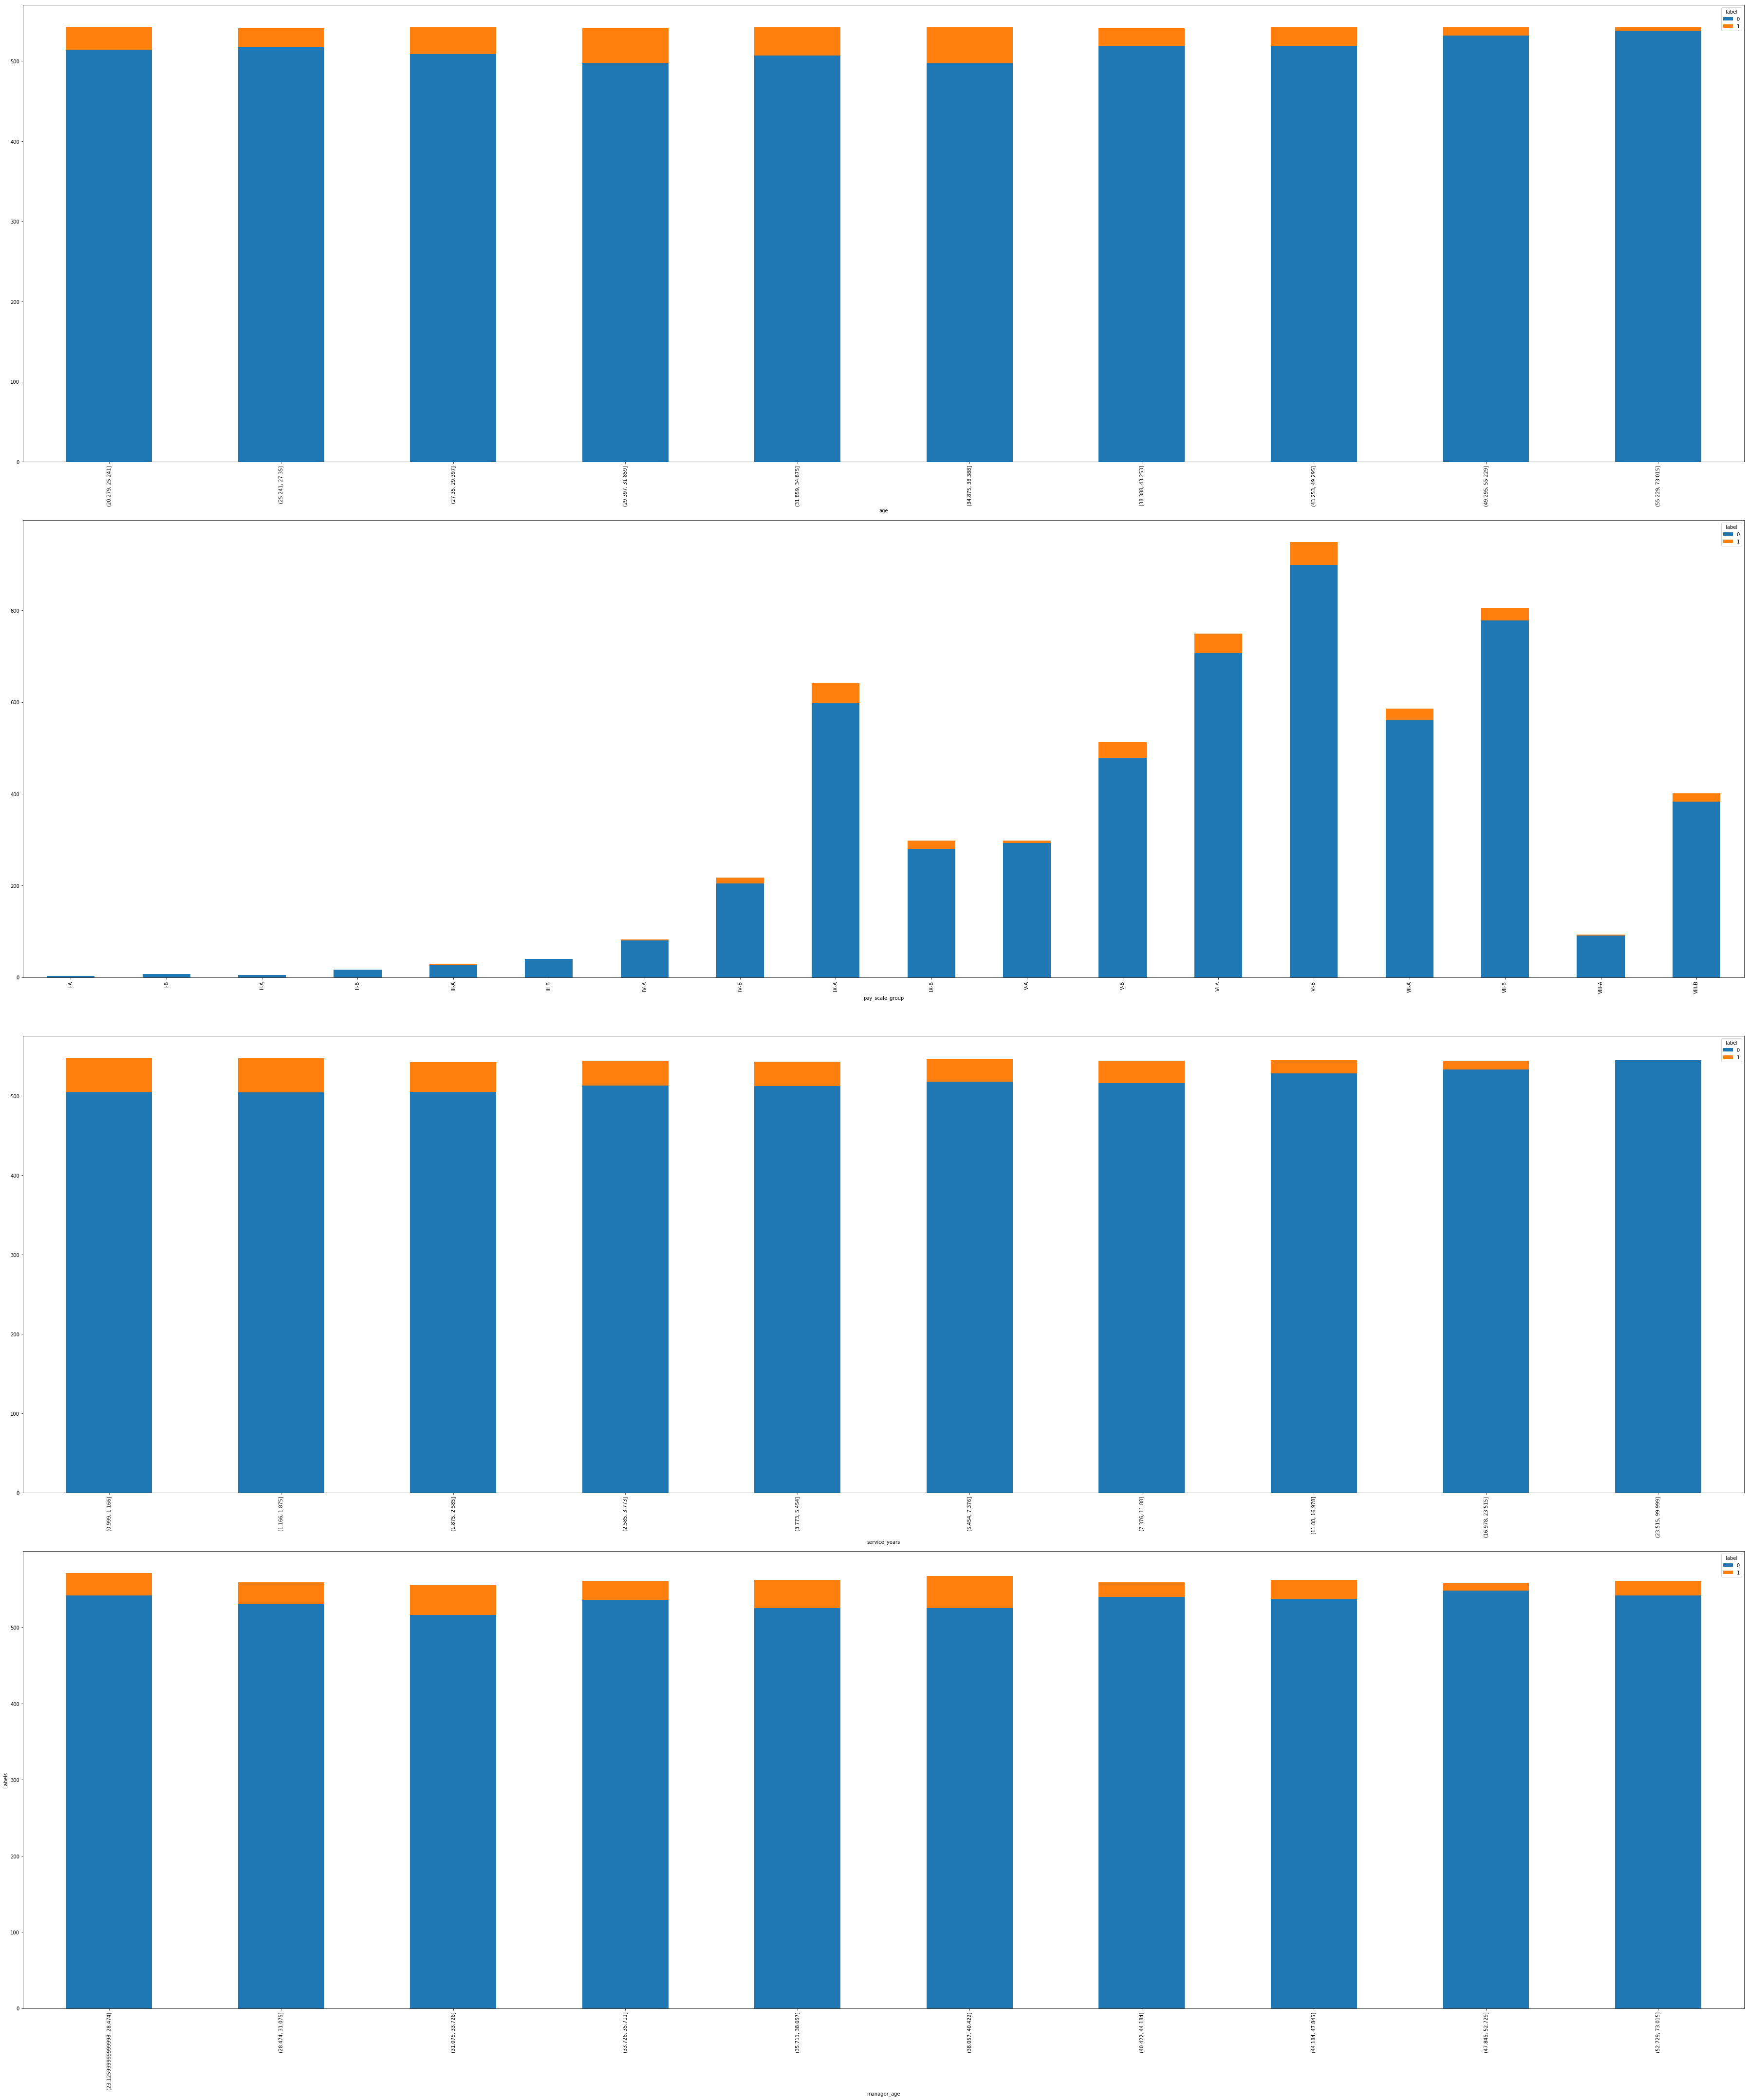

In [31]:
#Set axis objects
# fig, ax = plt.subplots(nrows=len(list(df1))-1, ncols=1,figsize=(50, 60))
fig, ax = plt.subplots(nrows=4, ncols=1,figsize=(50, 60))
df_total =[df1]
ctr=0

# all_feats = list(df1)
# all_feats.remove('label')
all_feats = ['age', 'pay_scale_group', 'service_years', 'manager_age']

#Iterate for all 3 datasets, for all 12 features selected
for i in range(len(all_feats)):
    for j in range(0,1):
        ix = np.unravel_index(ctr, ax.shape)    # compute an appropriate index (1d or 2d)
        plot_stacked_1(df_total[j],df_total[j][all_feats[i]],df_total[j]['label'],df_total[j][all_feats[i]].name,ix)
        ctr+=1
fig.tight_layout()
plt.savefig(plt_save_path)
    #plt.savefig("final")